# 関数近似 その3 
<div style="text-align: right;">
    <a href="function_fitting3.ipynb">[このページのオリジナルのipynbファイル]</a>
    <a href="index.html">[トップページへ戻る]</a>
</div>


## 関数近似とデータのばらつきの評価

### ある固定された設定の下で複数回の実験を行った場合のデータ整理

次のようなデータがについての分析をしてみよう。

固定した$x$の値に対して複数回の実験を行い、データを取得した場合、データのばらつきはエラーバーで表すことが通常用いられる。

次のように、x=[0,1,2,3,4,5]に対して測定値が与えれたとき、y軸に平均値とエラーバーを引いてみたい。


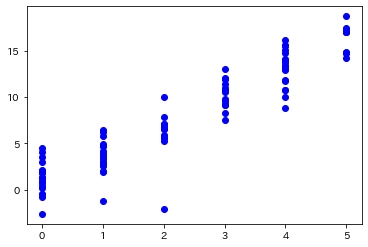

In [1]:
# データの準備
import numpy as np
import random

def make_sample_data(x):
    # y= ax + b を計算し、ガウス分布に従うノイズを加える
    y = np.array([3.0 * x1 + 1.0 + np.random.normal(0., np.random.normal(2.0,0.5))
                  for x1 in x])
    return y

# xのデータ列
num = np.random.randint(10,20,5)
xi  = np.linspace(1., 5., 5)
x = np.full(num[0], 0)
for i in range(5):
    x = np.concatenate([x, np.full(num[i], xi[i])])

y = make_sample_data(x)

# データの描画
import matplotlib.pyplot as plt
plt.plot(x,y, "ob")

### 平均値の標準偏差の計算とエラーバー表示

$x$の値ごとに、$y$の平均値と標準偏差を計算して図示してみる。

numpyの配列でできないこともないが、できるだけfor文を使いたくないので、pythonのデータ分析でもっともよく用いられているpandasというモジュールを利用する。

もっぱらCやFORTRANなどで数値計算している人は、pandasのデータ構造は最初はわかりにくいがデータ処理には大変便利なものである。

ゆっくり解説する時間はないので例を示すので、それで学んでほしい。

In [5]:
# (x,y)を2列のarrayにし、それをpandasのDataFrameに変換する
data = np.stack([x,y]).T
data
# print(data) # 内容を試すときにはコメントを取ってみる

import pandas as pd

df = pd.DataFrame(data=data, columns=['x','y'])
df.head() # 最初の部分だけ表示

x         y
0  0.0  2.043072
1  0.0  4.501621
2  0.0  2.078966
3  0.0  4.123183
4  0.0 -2.588286

In [55]:
df.tail() # 最後の部分を試しに表示

x          y
78  5.0  12.442383
79  5.0  20.476912
80  5.0  14.345876
81  5.0  15.311635
82  5.0  14.570702

In [6]:
# xの値ごとに平均値と標準偏差を求める
mean_y = df.groupby('x').mean()  # 平均値
std_dev_y = df.groupby('x').std() # 標準偏差

# あと結合するために列名を変更
mean_y = mean_y.rename(columns={"y": "mean"})
std_dev_y = std_dev_y.rename(columns={"y": "std"})
print(mean_y)
print(std_dev_y)

          mean
x             
0.0   1.354806
1.0   3.649005
2.0   6.233164
3.0  10.385306
4.0  13.134573
5.0  16.287160
          std
x            
0.0  1.773912
1.0  1.755242
2.0  2.369113
3.0  1.518589
4.0  2.009566
5.0  1.531042


In [7]:
# データフレームの結合
summary_df = pd.concat([mean_y, std_dev_y], axis=1, join='inner')
summary_df

mean       std
x                       
0.0   1.354806  1.773912
1.0   3.649005  1.755242
2.0   6.233164  2.369113
3.0  10.385306  1.518589
4.0  13.134573  2.009566
5.0  16.287160  1.531042

In [8]:
summary_df= summary_df.reset_index() # マルチインデックスの解消 (必要ないのだろうが、以後の列名指定がよくわからない)
summary_df

x       mean       std
0  0.0   1.354806  1.773912
1  1.0   3.649005  1.755242
2  2.0   6.233164  2.369113
3  3.0  10.385306  1.518589
4  4.0  13.134573  2.009566
5  5.0  16.287160  1.531042

<AxesSubplot:xlabel='x'>

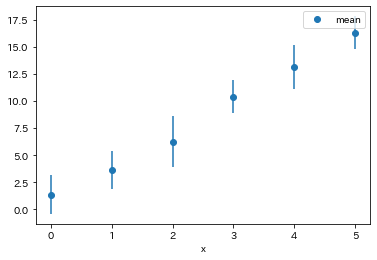

In [9]:
summary_df.plot(x='x', y='mean', fmt="o", yerr="std")

### 多項式フィッティング

scikit-learnのlinear_modelを使ってデータの多項式近似を行ってみる。




[-0.07008641  3.3014451   0.        ]
0.767416370255873


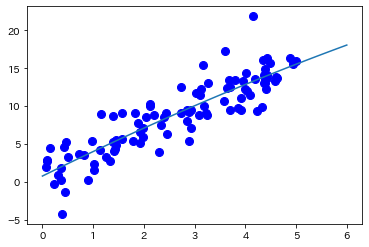

In [11]:
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

# べきフィッティングの次数
m = 2

# 予測の範囲
x_max = 6.0

# 説明変数の作成 (x, x^2, ...x^m) 行列
# うえで作ったxから「計画行列をつくる」
power_matrix_x = np.vander(x, m+1)

# 関数フィッティング
lrp = lm.LinearRegression()
lrp.fit(power_matrix_x, y)
# 予測
x_lrp = np.linspace(0., x_max, 100)
y_lrp = lrp.predict(np.vander(x_lrp, m+1))

# データの描画
plt.plot(x, y, "ob", ms=8)
# 近似曲線の描画
plt.plot(x_lrp, y_lrp)

print(lrp.coef_) # 説明変数の係数を出力
print(lrp.intercept_) # 切片

### (x,y)がセットでばらついている場合の関数フィッティング

データに載せるノイズを場所によって変える部分を変えたmake_sample_data2()も作成してあるので、それも試してみてほしい。（17行目の関数を変える）


[0.08273853 2.41770985 0.        ]
2.315775043019811


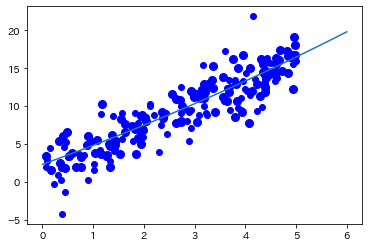

In [12]:
# データの準備
import numpy as np
import random

def make_sample_data2(x):
    # y= ax + b を計算しノイズを加える (ノイズが両側で大きくなるようなケース)   
    y = np.array([3.0 * x1 + 1.0 + np.random.normal(0., 3.0 + 0.5*(x1-2.5)**2)
                  for x1 in x])
    return y

# データの描画
import matplotlib.pyplot as plt
plt.plot(x,y, "ob")

# xを[0,5]のランダムな値とし、y = ax +b (上のままだとa=3, b=1)にガウスノイズを加えたデータとする
x = np.random.rand(100)*5.0
y = make_sample_data(x)

# 計画行列
m=2
power_matrix_x = np.vander(x, m+1)

# 関数フィッティング
lrp = lm.LinearRegression()
lrp.fit(power_matrix_x, y)

# 予測
x_lrp = np.linspace(0., x_max, 100)
y_lrp = lrp.predict(np.vander(x_lrp, m+1))

# データの描画
plt.plot(x, y, "ob", ms=8)
# 近似曲線の描画
plt.plot(x_lrp, y_lrp)

print(lrp.coef_) # 説明変数の係数を出力
print(lrp.intercept_) # 切片


このように$x$がばらばらの値で、それに対して$y$の値がデータとして得られる場合は、$x$の値による誤差の大きさをどのように評価してよいか難しくなる。

### エラーの評価の仕方

データの分布を踏まえた評価

図のように、得られたデータへの最適なカーブ(赤線)は、あくまでも得られたデータに対するもので、データは曲線の周りにガウス分布していると想定されている。

一般には、$x$の値によってデータのばらつきは異なる可能性がある。上記のデータはあえて$x$でのデータのばらつき（標準偏差$\sigma$）が変わる。そのような可能性も含め、得られたデータからばらつきの範囲を決めて以降等のがベイズ的な考え方である。

繰り返しになるが、以下ではフィッティングの係数を${\bf w}= (w_0, w_1, \cdots, w_M)$としている。べきフィッティングのばあいは
$$
 y(x,{\bf w}) = w_0 + w_1 x + w_2 x^2 +\ \cdots\ + w_M x^M
$$
として、データより${\bf w}$を求める。

模式図 (PRML 図1.16)

<img src="https://8tops.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/images/prmlfigs-png/Figure1.16.png" width="400"/>


**[注]**

ここではデータがガウス分布しているような例だけを扱うが、一般にはそうではない。特に、生物・生態学とか医学とかではガウス分布にならないものは多数ある。典型的には成長や減衰を示すような例で、上限や下限が決まっているような場合である。このようなデータについてはポアソン回帰やロジスティック回帰と呼ばれるものが用いられる。どのような統計モデルを利用するかは分析結果に大きな影響を及ぼす。(第7週ではロジスティック回帰を扱う。）

たとえば、
https://stats.biopapyrus.jp/glm/poisson-regression.html
のようなのが見つかった。

## ベイズ的予測に向けて


ベイズの考え方は、端的にいえば、データが追加されるごとに予測の範囲が狭まっていくというもので、モデル(例えばべき多項式）を選べば、モデルに含まれる係数がある確率分布をもって決められると考えるのである。

イメージとして、PRMLの図3.8を引用する。

最初に１つデータが得られたときの、データの存在予想範囲（各$x$での$y$の存在確率の標準偏差の幅）をピンクで示してある。赤の実線が予想曲線(存在範囲の中心）である。緑の実線は、データを作るときに使った$\sin$カーブであるが、これは伏せて見るのが良い。

ここでの予想曲線は、ちょっと複雑で、平均値が異なるガウシアンの線形結合としている。（時間があれば詳述：この図の描き方が、https://qiita.com/naoya_t/items/80ea108cebc694f5cd63 に公開されている。このページを読み解くとどのように推定しているかがわかる。）(次週に解説)

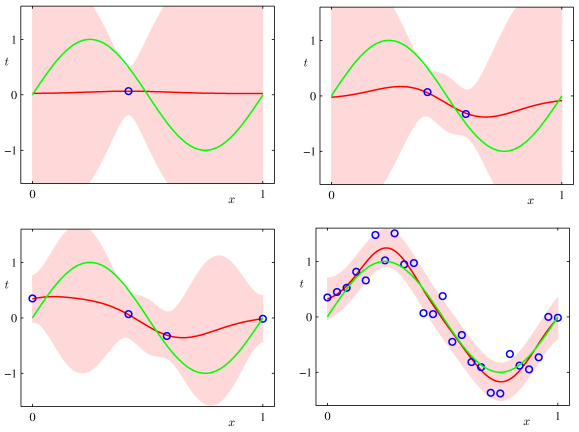

**(注)**

詳しいことは、上記のURLにある記述かPRML本を参照してもらいたいが、ここでのフィッティングはべき関数ではなく、「ガウシアン基底」を取っている。つまり、

$$
  y(x, {\bf w})  = w_1 \phi_1(x) + w_2 \phi_2(x) + \cdots + w_M \phi_M(x)
$$
$$
  \phi_i = \exp \left( - \frac{ (x - \mu_i)^2}{ 2\sigma^2} \right)
$$

として係数${\bf w}$を求めている。具体的には、$M=9$で、$\mu_i$は$[0,1]$の範囲を均等に並ぶようにセットしている。


[ベイズ統計の基礎へ](BayesApproach.html)